In [1]:
from brainscore_vision import score
from receptive_fields.util.experiment_setup import open_experiment
from torch import nn
import functools
from brainscore_vision.model_helpers.activations.pytorch import load_preprocess_images
from brainscore_vision.model_helpers.activations.pytorch import PytorchWrapper
from brainscore_vision.model_helpers.brain_transformation import ModelCommitment
from brainscore_vision.benchmarks.freemanziemba2013 import FreemanZiembaV1PublicBenchmark
from brainscore_vision.benchmarks.marques2020 import MarquesSchiller1976V1SpatialFrequencySelective
import random
import torch
from receptive_fields.util.modules import NamedFromSequential

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using", device)

model_path = "../models/areadne_submission/pool_large"
model, train_data= open_experiment(model_path)

/gpfs01/berens/user/fseel/miniconda3/envs/receptive-fields/lib/python3.11/site-packages/brainscore_core/metrics/__init__.py:16: FutureWarning: xarray subclass Score should explicitly define __slots__
  class Score(DataAssembly):


Using cuda
Files already downloaded and verified


In [2]:
random_model = NamedFromSequential(torch.nn.Sequential(torch.nn.Conv2d(3,2048,128), torch.nn.ELU()))

preprocessing = functools.partial(load_preprocess_images, image_size=160)
activations_model = PytorchWrapper(identifier="random_model", model=random_model, preprocessing=preprocessing)
brain_model = ModelCommitment(identifier="random_model", activations_model=activations_model,
                        # specify layers to consider
                        layers=['ELU_0'])
benchm = FreemanZiembaV1PublicBenchmark()
model_score = benchm(brain_model)
print(model_score)

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [01:49<00:00, 109.98s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [04:39<00:00, 279.56s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [34:40<00:00, 208.01s/it]

<xarray.Score ()>
array(0.03974402)
Attributes:
    error:    <xarray.Score ()>\narray(0.01491642)
    raw:      <xarray.Score ()>\narray(0.1755879)\nAttributes:\n    raw:     ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...


In [65]:
scores = {}
for layer in [11,8,5,2]:
    for image_size in [100, min(model.img_size), max(model.img_size), 240, 320, 360]:
        new_model = NamedFromSequential(model.get_sequential()[:layer]).to(device)
        _id = str(layer)+"_"+str(image_size)#str(random.randint(0,2**16))
        preprocessing = functools.partial(load_preprocess_images, image_size=image_size)
        activations_model = PytorchWrapper(identifier=_id, model=new_model, preprocessing=preprocessing)
        brain_model = ModelCommitment(identifier=_id, activations_model=activations_model,
                                # specify layers to consider
                                layers=['ELU_0'])
        benchm = FreemanZiembaV1PublicBenchmark()
        model_score = benchm(brain_model)
        scores[_id] = model_score
        print(model_score)

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


cross-validation: 100%|██████████| 10/10 [00:03<00:00,  2.66it/s]


<xarray.Score ()>
array(0.05640346)
Attributes:
    error:    <xarray.Score ()>\narray(0.01426026)
    raw:      <xarray.Score ()>\narray(0.20917586)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [00:06<00:00,  6.11s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [00:03<00:00,  2.77it/s]


<xarray.Score ()>
array(0.10567959)
Attributes:
    error:    <xarray.Score ()>\narray(0.01907618)
    raw:      <xarray.Score ()>\narray(0.2863217)\nAttributes:\n    raw:     ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [00:13<00:00, 13.34s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]


<xarray.Score ()>
array(0.15647697)
Attributes:
    error:    <xarray.Score ()>\narray(0.01833733)
    raw:      <xarray.Score ()>\narray(0.34840462)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [00:18<00:00, 18.27s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


<xarray.Score ()>
array(0.12992226)
Attributes:
    error:    <xarray.Score ()>\narray(0.01390241)
    raw:      <xarray.Score ()>\narray(0.31746839)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [00:23<00:00, 23.02s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


<xarray.Score ()>
array(0.13180664)
Attributes:
    error:    <xarray.Score ()>\narray(0.01851145)
    raw:      <xarray.Score ()>\narray(0.31976236)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [00:26<00:00, 26.03s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation:  50%|█████     | 5/10 [00:08<00:08,  1.75s/it]/gpfs01/berens/user/fseel/miniconda3/envs/receptive-fields/lib/python3.11/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
cross-validation: 100%|██████████| 10/10 [00:17<00:00,  1.80s/it]


<xarray.Score ()>
array(0.13272778)
Attributes:
    error:    <xarray.Score ()>\narray(0.0110127)
    raw:      <xarray.Score ()>\narray(0.32087776)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [00:11<00:00, 11.72s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation:  10%|█         | 1/10 [00:00<00:06,  1.48it/s]/gpfs01/berens/user/fseel/miniconda3/envs/receptive-fields/lib/python3.11/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
cross-validation: 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]


<xarray.Score ()>
array(0.20041181)
Attributes:
    error:    <xarray.Score ()>\narray(0.01316096)
    raw:      <xarray.Score ()>\narray(0.39429417)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [00:13<00:00, 13.95s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


<xarray.Score ()>
array(0.20316539)
Attributes:
    error:    <xarray.Score ()>\narray(0.01626362)
    raw:      <xarray.Score ()>\narray(0.39699366)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [00:14<00:00, 14.96s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation:  70%|███████   | 7/10 [00:08<00:03,  1.25s/it]/gpfs01/berens/user/fseel/miniconda3/envs/receptive-fields/lib/python3.11/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
cross-validation: 100%|██████████| 10/10 [00:13<00:00,  1.30s/it]


<xarray.Score ()>
array(0.18149221)
Attributes:
    error:    <xarray.Score ()>\narray(0.0128514)
    raw:      <xarray.Score ()>\narray(0.37522148)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [00:20<00:00, 20.99s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [00:59<00:00,  5.96s/it]


<xarray.Score ()>
array(0.15216684)
Attributes:
    error:    <xarray.Score ()>\narray(0.0129538)
    raw:      <xarray.Score ()>\narray(0.34357275)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [00:06<00:00,  6.10s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [00:33<00:00, 33.56s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [02:00<00:00, 12.04s/it]


<xarray.Score ()>
array(0.130313)
Attributes:
    error:    <xarray.Score ()>\narray(0.01260067)
    raw:      <xarray.Score ()>\narray(0.31794543)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [00:08<00:00,  8.20s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [00:39<00:00, 39.56s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [02:50<00:00, 17.08s/it]


<xarray.Score ()>
array(0.11893661)
Attributes:
    error:    <xarray.Score ()>\narray(0.0089246)
    raw:      <xarray.Score ()>\narray(0.30375013)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [00:01<00:00,  1.72s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [00:13<00:00, 13.62s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [00:41<00:00,  4.13s/it]


<xarray.Score ()>
array(0.19333344)
Attributes:
    error:    <xarray.Score ()>\narray(0.01042329)
    raw:      <xarray.Score ()>\narray(0.38726852)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [00:17<00:00, 17.53s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [01:15<00:00,  7.55s/it]


<xarray.Score ()>
array(0.19787422)
Attributes:
    error:    <xarray.Score ()>\narray(0.01249318)
    raw:      <xarray.Score ()>\narray(0.39178997)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [00:06<00:00,  6.46s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [00:24<00:00, 24.90s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [02:35<00:00, 15.57s/it]


<xarray.Score ()>
array(0.17020406)
Attributes:
    error:    <xarray.Score ()>\narray(0.01259768)
    raw:      <xarray.Score ()>\narray(0.36336547)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [00:19<00:00, 19.01s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [00:46<00:00, 46.07s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [06:00<00:00, 36.04s/it]


<xarray.Score ()>
array(0.15123595)
Attributes:
    error:    <xarray.Score ()>\narray(0.01079168)
    raw:      <xarray.Score ()>\narray(0.34252023)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [00:35<00:00, 35.26s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [01:17<00:00, 77.52s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [11:24<00:00, 68.42s/it]


<xarray.Score ()>
array(0.14934045)
Attributes:
    error:    <xarray.Score ()>\narray(0.00812534)
    raw:      <xarray.Score ()>\narray(0.34036698)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [00:45<00:00, 45.65s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

/gpfs01/berens/user/fseel/miniconda3/envs/receptive-fields/lib/python3.11/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
layers: 100%|██████████| 1/1 [01:35<00:00, 95.99s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation:  10%|█         | 1/10 [01:26<12:57, 86.34s/it]/gpfs01/berens/user/fseel/miniconda3/envs/receptive-fields/lib/python3.11/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
cross-validation: 100%|██████████| 10/10 [14:47<00:00, 88.76s/it]


<xarray.Score ()>
array(0.13622651)
Attributes:
    error:    <xarray.Score ()>\narray(0.00874186)
    raw:      <xarray.Score ()>\narray(0.32507946)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [00:13<00:00, 13.28s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [00:32<00:00, 32.41s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [03:50<00:00, 23.04s/it]


<xarray.Score ()>
array(0.15084409)
Attributes:
    error:    <xarray.Score ()>\narray(0.00862135)
    raw:      <xarray.Score ()>\narray(0.34207619)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [00:20<00:00, 20.03s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [00:44<00:00, 44.85s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [05:56<00:00, 35.64s/it]


<xarray.Score ()>
array(0.13895682)
Attributes:
    error:    <xarray.Score ()>\narray(0.01127177)
    raw:      <xarray.Score ()>\narray(0.32832098)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [00:36<00:00, 36.72s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [01:10<00:00, 70.93s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [10:43<00:00, 64.36s/it]


<xarray.Score ()>
array(0.1052845)
Attributes:
    error:    <xarray.Score ()>\narray(0.01587068)
    raw:      <xarray.Score ()>\narray(0.28578598)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [01:23<00:00, 83.02s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [02:29<00:00, 149.21s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [28:16<00:00, 169.66s/it]


<xarray.Score ()>
array(0.06622425)
Attributes:
    error:    <xarray.Score ()>\narray(0.01731933)
    raw:      <xarray.Score ()>\narray(0.226656)\nAttributes:\n    raw:      ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [02:32<00:00, 152.62s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [04:25<00:00, 265.36s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [58:49<00:00, 352.97s/it]


<xarray.Score ()>
array(0.0609514)
Attributes:
    error:    <xarray.Score ()>\narray(0.01342039)
    raw:      <xarray.Score ()>\narray(0.21744556)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [03:06<00:00, 186.12s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [05:30<00:00, 330.93s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [1:11:49<00:00, 430.98s/it]

<xarray.Score ()>
array(0.07325194)
Attributes:
    error:    <xarray.Score ()>\narray(0.01107218)
    raw:      <xarray.Score ()>\narray(0.23837915)\nAttributes:\n    raw:    ...
    ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...


In [66]:
scores

{'11_100': <xarray.Score ()>
 array(0.05640346)
 Attributes:
     error:    <xarray.Score ()>\narray(0.01426026)
     raw:      <xarray.Score ()>\narray(0.20917586)\nAttributes:\n    raw:    ...
     ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...,
 '11_120': <xarray.Score ()>
 array(0.10567959)
 Attributes:
     error:    <xarray.Score ()>\narray(0.01907618)
     raw:      <xarray.Score ()>\narray(0.2863217)\nAttributes:\n    raw:     ...
     ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...,
 '11_160': <xarray.Score ()>
 array(0.15647697)
 Attributes:
     error:    <xarray.Score ()>\narray(0.01833733)
     raw:      <xarray.Score ()>\narray(0.34840462)\nAttributes:\n    raw:    ...
     ceiling:  <xarray.DataArray ()>\narray(0.88076227)\nAttributes:\n    raw:...,
 '11_240': <xarray.Score ()>
 array(0.12992226)
 Attributes:
     error:    <xarray.Score ()>\narray(0.01390241)
     raw:      <xarray.Score ()>\narray(0.31746839)\n

In [82]:
res_array = torch.zeros((3, len(scores)))
for i, elem in enumerate(scores):
    layer, in_size = elem.split("_")
    res_array[0, i] = int(layer) 
    res_array[1, i] = int(in_size)
    res_array[2, i] = torch.from_numpy(scores[elem].values)

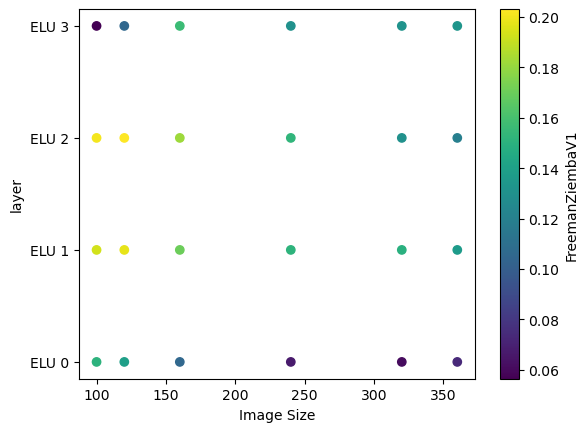

In [95]:
from matplotlib import pyplot as plt

plt.scatter(res_array[1], res_array[0], c=res_array[2])
plt.ylabel("layer")
plt.xlabel("Image Size")
plt.colorbar(label="FreemanZiembaV1")
plt.yticks(torch.unique(res_array[0]), labels=["ELU "+str(i) for i in range(4)])
plt.show()

In [36]:
aaa

NameError: name 'aaa' is not defined

In [ ]:
from brainscore_vision import score
model_score = score(model_identifier='pixels', benchmark_identifier='FreemanZiemba2013public.V1-pls')
print(model_score)

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


layers:   0%|          | 0/1 [00:00<?, ?it/s]

activations:   0%|          | 0/192 [00:00<?, ?it/s]

activations:   0%|          | 0/1024 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]



layer principal components: 100%|██████████| 1/1 [00:15<00:00, 15.43s/it]


layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

layers: 100%|██████████| 1/1 [00:37<00:00, 37.01s/it]


activations:   0%|          | 0/192 [00:00<?, ?it/s]

layer packaging:   0%|          | 0/1 [00:00<?, ?it/s]

cross-validation: 100%|██████████| 10/10 [02:35<00:00, 15.55s/it]

<xarray.Score ()>
array(0.04261842)
Attributes:
    error:                 <xarray.Score ()>\narray(0.01319437)
    raw:                   <xarray.Score ()>\narray(0.18182658)\nAttributes:\...
    ceiling:               <xarray.DataArray ()>\narray(0.88076227)\nAttribut...
    model_identifier:      pixels
    benchmark_identifier:  FreemanZiemba2013public.V1-pls
    comment:               layers: {'V1': 'pixels'}
